<a href="https://colab.research.google.com/github/samp3209/kaggleprojects/blob/main/samp3209_gmail_com.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing

In [490]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from numpy import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [491]:
#importing data
dp = pd.read_csv('Daily Precipitation.csv')
ds = pd.read_csv('Daily Soil Mositure.csv')
dt = pd.read_csv('Daily Temperature.csv')
ed = pd.read_csv('Eight Day NDVI.csv')
pq = pd.read_csv('Production Quantity.csv')
pp = pd.read_csv('predicted_production_qty.csv')


# Missing values

In [492]:
dp['precip'].isnull().values.any()

False

In [493]:
dt['temp'].isnull().values.any()

False

In [494]:
ds['smos'].isnull().sum()
ds = ds.dropna()
ds['smos'].isnull().sum()

0

In [495]:
ed['ndvi'].isnull().values.any()

False

In [496]:
pq['prod'].isnull().values.any()

False

# Exploritory Data Analysis

In [497]:
dp.describe()

,precip,region_id
count,29940.000000,29940.000000
mean,7.275856,99.000000
std,9.468009,4.098849
min,0.000000,93.000000
25%,1.112265,95.000000
50%,4.340616,98.500000
75%,10.086396,103.000000
max,151.307444,105.000000


In [498]:
ds.describe()

,smos,region_id
count,29603.000000,29603.000000
mean,0.266492,98.982772
std,0.092495,4.091924
min,0.004318,93.000000
25%,0.203135,95.000000
50%,0.260049,98.000000
75%,0.321686,103.000000
max,0.814535,105.000000


In [499]:
dt.describe()

,temp,region_id
count,12930.000000,12930.000000
mean,26.542191,99.167131
std,2.494511,4.011680
min,17.031505,93.000000
25%,24.843353,95.000000
50%,26.591613,99.000000
75%,28.185999,103.000000
max,37.295265,105.000000


In [500]:
ed.describe()

,ndvi,region_id
count,3338.000000,3338.000000
mean,0.798429,98.993110
std,0.033146,4.048361
min,0.573141,93.000000
25%,0.784141,95.000000
50%,0.805861,99.000000
75%,0.821163,103.000000
max,0.862471,105.000000


In [501]:
pq.describe()

,prod,region_id
count,720.000000,720.00000
mean,159014.201389,99.00000
std,142882.722751,4.10163
min,10215.000000,93.00000
25%,35445.500000,95.00000
50%,91945.500000,98.50000
75%,269946.000000,103.00000
max,593579.000000,105.00000


# Time Feature engineering

In [502]:
dp

,start_date,end_date,precip,region_id
0,2014-01-01T00:00:00.000Z,2014-01-01T00:00:00.000Z,1.392393,93
1,2014-01-02T00:00:00.000Z,2014-01-02T00:00:00.000Z,0.315380,93
2,2014-01-03T00:00:00.000Z,2014-01-03T00:00:00.000Z,2.347846,93
3,2014-01-04T00:00:00.000Z,2014-01-04T00:00:00.000Z,21.466357,93
4,2014-01-05T00:00:00.000Z,2014-01-05T00:00:00.000Z,32.823651,93
...,...,...,...,...
29935,2022-03-09T00:00:00.000Z,2022-03-09T00:00:00.000Z,0.041747,105
29936,2022-03-10T00:00:00.000Z,2022-03-10T00:00:00.000Z,0.090011,105
29937,2022-03-11T00:00:00.000Z,2022-03-11T00:00:00.000Z,0.021150,105
29938,2022-03-12T00:00:00.000Z,2022-03-12T00:00:00.000Z,0.092205,105


In [503]:
#converting to datetime
dp['start_date'] = pd.to_datetime(dp['start_date'])
dp['end_date'] = pd.to_datetime(dp['end_date'])
dt['start_date'] = pd.to_datetime(dt['start_date'])
dt['end_date'] = pd.to_datetime(dt['end_date'])
ds['start_date'] = pd.to_datetime(ds['start_date'])
ds['end_date'] = pd.to_datetime(ds['end_date'])
ed['start_date'] = pd.to_datetime(ed['start_date'])
ed['end_date'] = pd.to_datetime(ed['end_date'])
pq['start_date'] = pd.to_datetime(pq['start_date'])
pq['end_date'] = pd.to_datetime(pq['end_date'])
pp['start_date'] = pd.to_datetime(pp['start_date'])
pp['end_date'] = pd.to_datetime(pp['end_date'])

In [504]:
#adding year and month columns
dp['year'] = pd.DatetimeIndex(dp['start_date']).year
ds['year'] = pd.DatetimeIndex(ds['start_date']).year
dt['year'] = pd.DatetimeIndex(dt['start_date']).year
ed['year'] = pd.DatetimeIndex(ed['start_date']).year
pq['year'] = pd.DatetimeIndex(pq['start_date']).year
dp['month'] = pd.DatetimeIndex(dp['start_date']).month
ds['month'] = pd.DatetimeIndex(ds['start_date']).month
dt['month'] = pd.DatetimeIndex(dt['start_date']).month
ed['month'] = pd.DatetimeIndex(ed['start_date']).month
pq['month'] = pd.DatetimeIndex(pq['start_date']).month
dp['day'] = pd.DatetimeIndex(dp['start_date']).day
ds['day'] = pd.DatetimeIndex(ds['start_date']).day
dt['day'] = pd.DatetimeIndex(dt['start_date']).day
ed['day'] = pd.DatetimeIndex(ed['start_date']).day
pq['day'] = pd.DatetimeIndex(pq['start_date']).day


In [505]:
#dp = dp.drop(columns=['start_date', 'end_date'])
ds = ds.drop(columns=['start_date', 'end_date'])
dt = dt.drop(columns=['start_date', 'end_date'])
pq = pq.drop(columns=['start_date', 'end_date'])
ed = ed.drop(columns=['start_date', 'end_date'])
ed

,ndvi,region_id,year,month,day
0,0.679106,93,2013,12,27
1,0.701431,93,2014,1,1
2,0.745149,93,2014,1,9
3,0.747391,93,2014,1,17
4,0.768325,93,2014,1,25
...,...,...,...,...,...
3333,0.798257,105,2022,1,9
3334,0.793242,105,2022,1,17
3335,0.804884,105,2022,1,25
3336,0.776287,105,2022,2,18


In [506]:
pq.head(30)

,prod,region_id,year,month,day
0,171725,93,2015,1,1
1,188325,93,2015,2,1
2,247856,93,2015,3,1
3,282791,93,2015,4,1
4,291057,93,2015,5,1
5,287502,93,2015,6,1
6,288086,93,2015,7,1
7,313321,93,2015,8,1
8,299337,93,2015,9,1
9,300383,93,2015,10,1


#  Relationship Analysis

In [507]:
#looking at every feature with correlation against target variable
pq.apply(lambda s: ed.corrwith(s))

,prod,region_id,year,month,day
ndvi,-0.154764,-0.165702,-0.047868,-0.002279,NaN
region_id,0.170121,0.868667,0.105788,0.010212,NaN
year,-0.164985,0.238865,-0.011723,0.011681,NaN
month,0.024724,-0.001892,-0.018159,0.009693,NaN
day,0.019235,0.024026,-0.010692,0.059586,NaN


In [508]:
pq.apply(lambda s: ds.corrwith(s))

,prod,region_id,year,month,day
smos,-0.089478,0.124998,-0.026972,-0.008684,NaN
region_id,NaN,NaN,NaN,NaN,NaN
year,0.282936,0.878341,0.012199,0.010863,NaN
month,-0.299271,0.446436,0.178416,0.014085,NaN
day,0.007841,0.028922,-0.022657,0.001220,NaN


In [509]:
pq.apply(lambda s: dt.corrwith(s))

,prod,region_id,year,month,day
temp,-0.002334,0.309658,0.151968,0.026823,NaN
region_id,NaN,NaN,NaN,NaN,NaN
year,0.046547,0.964401,0.068578,0.017523,NaN
month,0.036282,-0.010420,0.138661,-0.017150,NaN
day,-0.034017,-0.060098,0.052146,0.056719,NaN


In [510]:
pq.apply(lambda s: dp.corrwith(s))

,prod,region_id,year,month,day
precip,-0.050647,0.094018,-0.048732,-0.044530,NaN
region_id,NaN,NaN,NaN,NaN,NaN
year,0.282198,0.878395,0.020333,0.014083,NaN
month,-0.303868,0.434497,0.164777,0.006607,NaN
day,0.018969,0.020739,-0.034498,0.022350,NaN


**Not seeing much in regular correlation metric**

In [511]:
#grouping by region first to mimic final output dataset
edmonthlymean = ed.groupby(['region_id', 'month']).agg({'ndvi': ['mean', 'std']})

pqmonthlymean = pq.groupby(['region_id','month']).agg({'prod': ['mean', 'std']})
pqmonthlymean
#edmonthlymean = edmonthlymean.to_frame()
#pqmonthlymean = pqmonthlymean.to_frame()
pqmonthlymean.apply(lambda s: edmonthlymean.corrwith(s))
dtmonthlymean = dt.groupby(['region_id','month']).agg({'temp': ['mean', 'std']})
dtmonthlymean
#dtmonthlymean = dtmonthlymean.to_frame()
pqmonthlymean.apply(lambda s: dtmonthlymean.corrwith(s))
dsmonthlymean = ds.groupby(['region_id','month']).agg({'smos': ['mean', 'std']})
dsmonthlymean
#dsmonthlymean = dsmonthlymean.to_frame()
pqmonthlymean.apply(lambda s: dsmonthlymean.corrwith(s))
dpmonthlymean = dp.groupby(['region_id','month']).agg({'precip': ['mean', 'std']})
dpmonthlymean
#dpmonthlymean = dpmonthlymean.to_frame()
pqmonthlymean.apply(lambda s: dpmonthlymean.corrwith(s))

prod          
                 mean       std
precip mean  0.046991 -0.052744
       std  -0.349287 -0.199782

In [512]:
dtmonthlymean

temp          
                      mean       std
region_id month                     
93        1      26.256897  2.018157
          2      27.148711  2.148688
          3      28.161942  2.585481
          4      28.087259  1.991391
          5      27.354363  2.143572
...                    ...       ...
105       8      26.913939  2.190126
          9      27.001864  2.307961
          10     26.964059  2.274853
          11     24.921609  2.546891
          12     24.149071  2.159222

[120 rows x 2 columns]

Going to build a data set with all of these values to get covariance matrix

In [513]:
all_data = pd.DataFrame()
frames = [dtmonthlymean, dpmonthlymean, dsmonthlymean, edmonthlymean, pqmonthlymean]
mdf = pd.concat(frames, axis=1, join='inner')
mdf = mdf.reset_index(drop=False)
mdf

region_id month       temp               precip                 smos  \
                          mean       std       mean        std      mean   
0          93     1  26.256897  2.018157   6.734694  18.279852  0.353934   
1          93     2  27.148711  2.148688   3.688939   8.912959  0.328579   
2          93     3  28.161942  2.585481   5.146203   8.226540  0.298108   
3          93     4  28.087259  1.991391   9.245788   8.468055  0.304315   
4          93     5  27.354363  2.143572   8.632011   7.248088  0.305914   
..        ...   ...        ...       ...        ...        ...       ...   
115       105     8  26.913939  2.190126   7.204407   6.407797  0.199416   
116       105     9  27.001864  2.307961   8.502863   7.538544  0.220041   
117       105    10  26.964059  2.274853  10.043377  10.087528  0.251855   
118       105    11  24.921609  2.546891  16.712988  20.664776  0.287078   
119       105    12  24.149071  2.159222  16.111508  26.129512  0.294033   

                   ndvi                     prod                
          std      mean       std           mean           std  
0    0.087390  0.779871  0.030583  214462.333333  51791.844581  
1    0.075920  0.780302  0.017546  210410.500000  29366.402427  
2    0.067965  0.778867  0.023068  233609.000000  29424.635814  
3    0.069239  0.803795  0.015673  245193.666667  32668.883438  
4    0.077079  0.816674  0.014357  247826.666667  30485.581567  
..        ...       ...       ...            ...           ...  
115  0.088447  0.808546  0.011913   50970.333333   8007.244412  
116  0.101761  0.798222  0.031316   52639.333333   3461.468051  
117  0.133664  0.802803  0.019687   55461.000000   4452.969301  
118  0.138618  0.786172  0.040166   48454.333333   4979.024510  
119  0.131528  0.765717  0.060873   40316.500000   5449.960211  

[120 rows x 12 columns]

In [514]:
mdf.cov()

region_id         month          temp                \
                                                    mean           std   
region_id          16.941176      0.000000     -1.208150     -0.117746   
month               0.000000     12.016807     -0.711489     -0.330918   
temp      mean     -1.208150     -0.711489      1.381924      0.208714   
          std      -0.117746     -0.330918      0.208714      0.093777   
precip    mean      2.035311      4.540001     -0.886393     -0.225705   
          std       0.186814      0.958260     -1.026694      0.063815   
smos      mean     -0.066734      0.022258      0.006201      0.002797   
          std       0.000856      0.002943     -0.001700      0.001682   
ndvi      mean      0.012715      0.013771     -0.014597     -0.004774   
          std      -0.000552      0.010851      0.001572      0.000492   
prod      mean  97932.806723  44347.535714 -60471.082715 -26907.440198   
          std    5645.413060  -1810.115419  -8806.611188  -3352.645625   

                      precip                        smos               \
                        mean            std         mean          std   
region_id           2.035311       0.186814    -0.066734     0.000856   
month               4.540001       0.958260     0.022258     0.002943   
temp      mean     -0.886393      -1.026694     0.006201    -0.001700   
          std      -0.225705       0.063815     0.002797     0.001682   
precip    mean      7.584206       4.288205     0.033575     0.008328   
          std       4.288205      11.018652     0.060958     0.036436   
smos      mean      0.033575       0.060958     0.002934     0.000351   
          std       0.008328       0.036436     0.000351     0.000313   
ndvi      mean      0.005334      -0.026442    -0.000546    -0.000165   
          std       0.007260       0.014756     0.000223     0.000068   
prod      mean  18269.902623 -163687.248059 -2469.335788 -1417.778605   
          std   -2595.604252  -11850.286764  -259.189679  -139.931094   

                       ndvi                      prod                
                       mean         std          mean           std  
region_id          0.012715   -0.000552  9.793281e+04  5.645413e+03  
month              0.013771    0.010851  4.434754e+04 -1.810115e+03  
temp      mean    -0.014597    0.001572 -6.047108e+04 -8.806611e+03  
          std     -0.004774    0.000492 -2.690744e+04 -3.352646e+03  
precip    mean     0.005334    0.007260  1.826990e+04 -2.595604e+03  
          std     -0.026442    0.014756 -1.636872e+05 -1.185029e+04  
smos      mean    -0.000546    0.000223 -2.469336e+03 -2.591897e+02  
          std     -0.000165    0.000068 -1.417779e+03 -1.399311e+02  
ndvi      mean     0.000508   -0.000136  1.998479e+03  2.320464e+02  
          std     -0.000136    0.000098 -3.280305e+02 -4.214210e+01  
prod      mean  1998.479050 -328.030462  1.993133e+10  2.186786e+09  
          std    232.046416  -42.142100  2.186786e+09  3.193133e+08

                   region_id         month      temp              precip  \
                                                mean       std      mean   
region_id       1.000000e+00 -9.206607e-17 -0.249693 -0.093417  0.179558   
month          -9.206607e-17  1.000000e+00 -0.174595 -0.311729  0.475561   
temp      mean -2.496934e-01 -1.745950e-01  1.000000  0.579779 -0.273797   
          std  -9.341689e-02 -3.117293e-01  0.579779  1.000000 -0.267633   
precip    mean  1.795576e-01  4.755611e-01 -0.273797 -0.267633  1.000000   
          std   1.367333e-02  8.327693e-02 -0.263108  0.062778  0.469090   
smos      mean -2.993358e-01  1.185431e-01  0.097391  0.168652  0.225086   
          std   1.174329e-02  4.795548e-02 -0.081690  0.310237  0.170809   
ndvi      mean  1.370000e-01  1.761659e-01 -0.550660 -0.691375  0.085891   
          std  -1.357447e-02  3.165675e-01  0.135222  0.162633  0.266620   
prod      mean  1.685343e-01  9.061639e-02 -0.364366 -0.622381  0.046991   
          st

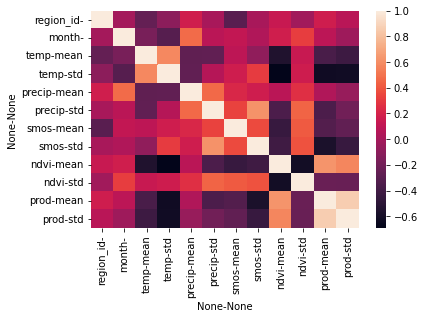

In [515]:
corr = mdf.corr()
print(corr)
sns.heatmap(corr)

I think I am going to build my model using ndvi mean and maybe smos std

# Data Viz Section


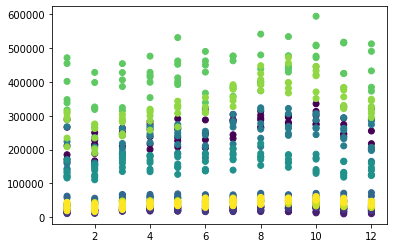

In [516]:
plt.scatter('month', 'prod', c='region_id', data=pq)

<BarContainer object of 3338 artists>

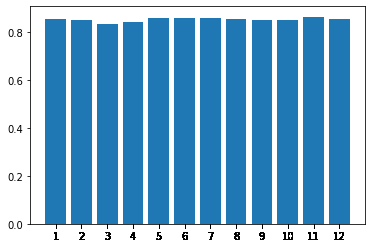

In [517]:
plt.bar(ed['month'], ed['ndvi'], tick_label=ed['month'])


<BarContainer object of 29603 artists>

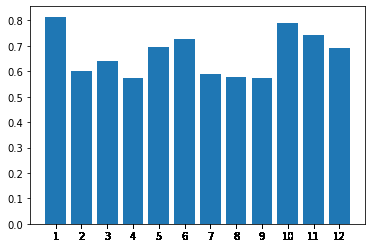

In [518]:
plt.bar(ds['month'], ds['smos'], tick_label=ds['month'])


<BarContainer object of 720 artists>

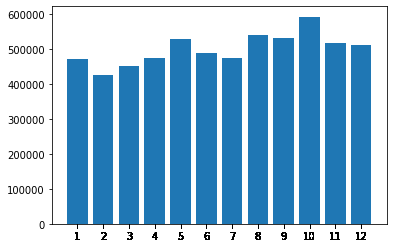

In [519]:
plt.bar(pq['month'], pq['prod'], tick_label=pq['month'])

# Model Selection

In [520]:
#master dateframe
mdf

region_id month       temp               precip                 smos  \
                          mean       std       mean        std      mean   
0          93     1  26.256897  2.018157   6.734694  18.279852  0.353934   
1          93     2  27.148711  2.148688   3.688939   8.912959  0.328579   
2          93     3  28.161942  2.585481   5.146203   8.226540  0.298108   
3          93     4  28.087259  1.991391   9.245788   8.468055  0.304315   
4          93     5  27.354363  2.143572   8.632011   7.248088  0.305914   
..        ...   ...        ...       ...        ...        ...       ...   
115       105     8  26.913939  2.190126   7.204407   6.407797  0.199416   
116       105     9  27.001864  2.307961   8.502863   7.538544  0.220041   
117       105    10  26.964059  2.274853  10.043377  10.087528  0.251855   
118       105    11  24.921609  2.546891  16.712988  20.664776  0.287078   
119       105    12  24.149071  2.159222  16.111508  26.129512  0.294033   

                   ndvi                     prod                
          std      mean       std           mean           std  
0    0.087390  0.779871  0.030583  214462.333333  51791.844581  
1    0.075920  0.780302  0.017546  210410.500000  29366.402427  
2    0.067965  0.778867  0.023068  233609.000000  29424.635814  
3    0.069239  0.803795  0.015673  245193.666667  32668.883438  
4    0.077079  0.816674  0.014357  247826.666667  30485.581567  
..        ...       ...       ...            ...           ...  
115  0.088447  0.808546  0.011913   50970.333333   8007.244412  
116  0.101761  0.798222  0.031316   52639.333333   3461.468051  
117  0.133664  0.802803  0.019687   55461.000000   4452.969301  
118  0.138618  0.786172  0.040166   48454.333333   4979.024510  
119  0.131528  0.765717  0.060873   40316.500000   5449.960211  

[120 rows x 12 columns]

In [521]:
#target dataframe
pp

,start_date,end_date,prod,region_id
0,2021-01-01 00:00:00+00:00,2021-01-31 00:00:00+00:00,NaN,93
1,2021-02-01 00:00:00+00:00,2021-02-28 00:00:00+00:00,NaN,93
2,2021-03-01 00:00:00+00:00,2021-03-31 00:00:00+00:00,NaN,93
3,2021-04-01 00:00:00+00:00,2021-04-30 00:00:00+00:00,NaN,93
4,2021-05-01 00:00:00+00:00,2021-05-31 00:00:00+00:00,NaN,93
...,...,...,...,...
115,2021-08-01 00:00:00+00:00,2021-08-31 00:00:00+00:00,NaN,105
116,2021-09-01 00:00:00+00:00,2021-09-30 00:00:00+00:00,NaN,105
117,2021-10-01 00:00:00+00:00,2021-10-31 00:00:00+00:00,NaN,105
118,2021-11-01 00:00:00+00:00,2021-11-30 00:00:00+00:00,NaN,105


In [554]:
#target dataset which im including all variables. formatting the set to follow the format of the output dataset where region is before month
target = pd.DataFrame()

target['prodmean'] = mdf.iloc[:,10]
target['ndvimean'] = mdf.iloc[:,8]
target['ndvistd'] = mdf.iloc[:,9]
target['month'] = mdf.iloc[:,1]
target['region_id'] = mdf.iloc[:,0]
target['tempmean'] = mdf.iloc[:,2]
target['tempstd'] = mdf.iloc[:,3]
target['precipmean'] = mdf.iloc[:,4]
target['precipstd'] = mdf.iloc[:,5]
target['smosmean'] = mdf.iloc[:,6]
target['smosstd'] = mdf.iloc[:,7]
target['prodstd'] = mdf.iloc[:,11]
target['prodmean'] = np.log2(target['prodmean'])
target['prodstd'] = np.log2(target['prodstd'])

In [555]:
target.corr()

,prodmean,ndvimean,ndvistd,month,region_id,tempmean,tempstd,precipmean,precipstd,smosmean,smosstd,prodstd
prodmean,1.000000,0.640938,-0.262208,6.843746e-02,1.643521e-01,-0.313835,-0.633160,0.041158,-0.329997,-0.300045,-0.580967,0.916553
ndvimean,0.640938,1.000000,-0.609509,1.761659e-01,1.370000e-01,-0.550660,-0.691375,0.085891,-0.353268,-0.446839,-0.412644,0.658358
ndvistd,-0.262208,-0.609509,1.000000,3.165675e-01,-1.357447e-02,0.135222,0.162633,0.266620,0.449566,0.415644,0.388533,-0.314486
month,0.068437,0.176166,0.316567,1.000000e+00,-9.206607e-17,-0.174595,-0.311729,0.475561,0.083277,0.118543,0.047955,-0.018564
region_id,0.164352,0.137000,-0.013574,-9.206607e-17,1.000000e+00,-0.249693,-0.093417,0.179558,0.013673,-0.299336,0.011743,0.060306
tempmean,-0.313835,-0.550660,0.135222,-1.745950e-01,-2.496934e-01,1.000000,0.579779,-0.273797,-0.263108,0.097391,-0.081690,-0.426903
tempstd,-0.633160,-0.691375,0.162633,-3.117293e-01,-9.341689e-02,0.579779,1.000000,-0.267633,0.062778,0.168652,0.310237,-0.686949
precipmean,0.041158,0.085891,0.266620,4.755611e-01,1.795576e-01,-0.273797,-0.267633,1.000000,0.469090,0.225086,0.170809,-0.031187
precipstd,-0.329997,-0.353268,0.449566,8.327693e-02,1.367333e-02,-0.263108,0.062778,0.469090,1.000000,0.339042,0.620005,-0.229550
smosmean,-0.300045,-0.446839,0.415644,1.185431e-01,-2.993358e-01,0.097391,0.168652,0.225086,0.339042,1.000000,0.365611,-0.243941


In [556]:
#Inputs for models
#target
Y = target['prodmean']
#features
X = target[['ndvimean']]

In [563]:
#splitting data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
X_test=np.array(X_test)
X_test=np.array(X_test)
#X_train= X_train.reshape(-1, 1)
#y_train= y_train.reshape(-1, 1)
#x_test = x_test.reshape(-1, 1)

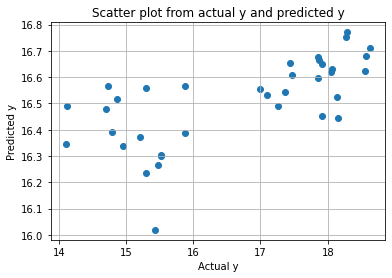

Mean Absolute percentage Error : 0.07744634586500125
Mean Absolute Error : 1.2762824967785353
r2 score is : 0.1246764262042579


In [564]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

#SGD Regressor
n_iter=1000
clf_ = SGDRegressor(max_iter=n_iter)
#clf = KNeighborsRegressor(n_neighbors=1)
#clf = LinearRegression()
clf_.fit(X_train.values, Y_train.values)

y_pred_sksgd=clf_.predict(X_test)
plt.scatter(Y_test,y_pred_sksgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Absolute percentage Error :',mean_absolute_percentage_error(Y_test, y_pred_sksgd))
print('Mean Absolute Error :',mean_absolute_error(Y_test, y_pred_sksgd))
print('r2 score is :', r2_score(Y_test, y_pred_sksgd))
#print('y is:', Y_test)
#print('predicted was:', y_pred_sksgd)

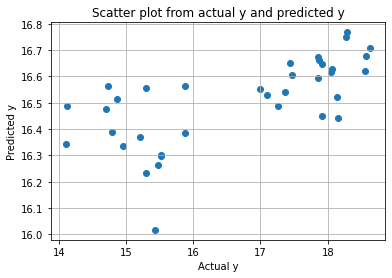

Mean Absolute percentage Error : 0.07745025312222827
Mean Absolute Error : 1.2765507223178973
r2 score is : 0.12434612649270793


In [565]:
clf = KNeighborsRegressor(n_neighbors=1)
#clf = LinearRegression()
clf_.fit(X_train.values, Y_train.values)

y_pred_sksgd=clf_.predict(X_test)
plt.scatter(Y_test,y_pred_sksgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Absolute percentage Error :',mean_absolute_percentage_error(Y_test, y_pred_sksgd))
print('Mean Absolute Error :',mean_absolute_error(Y_test, y_pred_sksgd))
print('r2 score is :', r2_score(Y_test, y_pred_sksgd))
#print('y is:', Y_test)
#print('predicted was:', y_pred_sksgd)

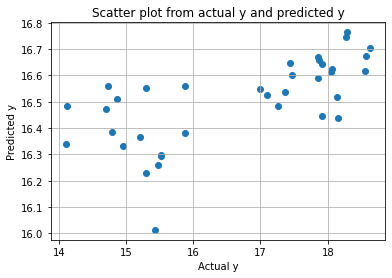

Mean Absolute percentage Error : 0.07745850002321779
Mean Absolute Error : 1.2770059088771344
r2 score is : 0.1237792319292873


In [566]:
clf = LinearRegression()
clf_.fit(X_train.values, Y_train.values)

y_pred_sksgd=clf_.predict(X_test)
plt.scatter(Y_test,y_pred_sksgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Absolute percentage Error :',mean_absolute_percentage_error(Y_test, y_pred_sksgd))
print('Mean Absolute Error :',mean_absolute_error(Y_test, y_pred_sksgd))
print('r2 score is :', r2_score(Y_test, y_pred_sksgd))
#print('y is:', Y_test)
#print('predicted was:', y_pred_sksgd)

In [561]:
#XGBoost regressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
scores = cross_val_score(XGBRegressor(objective='reg:squarederror'), X, Y, scoring='neg_mean_squared_error')
scores = (-scores)**.5
scores

array([2.00376035, 1.86627009, 1.37569218, 1.62686179, 1.03176678])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KernelRidge was fitted with feature names
  "X does not have valid feature names, but"


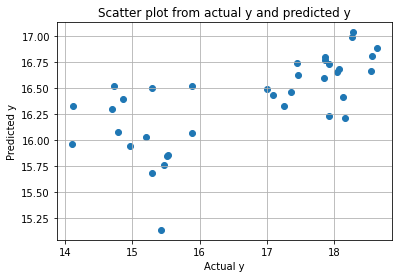

Mean Absolute percentage Error : 0.06842280435336198
Mean Absolute Error : 1.137167269555405
r2 score is : 0.25758237623011837
y is: 69     17.259251
55     18.043149
45     15.881469
7      18.135096
119    15.299083
34     14.790484
66     17.446071
89     18.287893
112    15.293945
60     16.999216
74     18.555629
85     17.871939
23     14.122275
30     14.727309
31     14.859373
91     18.631399
4      17.918972
103    15.526229
44     15.884914
86     18.068296
68     17.363118
110    14.959210
88     18.271502
70     17.090810
67     17.468605
37     15.519037
104    15.474984
52     17.861870
8      18.155751
28     14.703273
24     14.104967
98     15.432014
51     17.857423
11     17.918543
72     18.566381
106    15.205634
Name: prodmean, dtype: float64
predicted was: [16.32667278 16.65676363 16.0645657  16.41801088 15.68584585 16.07304754
 16.74250075 17.03800359 16.49894628 16.48902196 16.66410383 16.7702341
 16.32388552 16.51594963 16.39775867 16.88346295 16.72971842 15.

In [567]:
from sklearn.kernel_ridge import KernelRidge
krr = KernelRidge(alpha=1.0)
krr.fit(X,Y)
y_pred_sksgd=krr.predict(X_test)
plt.scatter(Y_test,y_pred_sksgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Absolute percentage Error :',mean_absolute_percentage_error(Y_test, y_pred_sksgd))
print('Mean Absolute Error :',mean_absolute_error(Y_test, y_pred_sksgd))
print('r2 score is :', r2_score(Y_test, y_pred_sksgd))
print('y is:', Y_test)
print('predicted was:', y_pred_sksgd)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


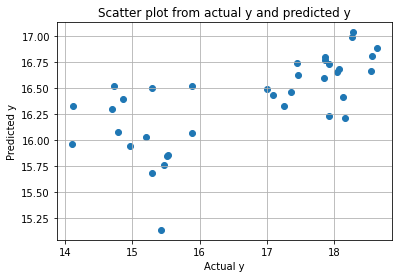

Mean Absolute percentage Error : 0.06842280435336198
Mean Absolute Error : 1.137167269555405
r2 score is : 0.25758237623011837
y is: 69     17.259251
55     18.043149
45     15.881469
7      18.135096
119    15.299083
34     14.790484
66     17.446071
89     18.287893
112    15.293945
60     16.999216
74     18.555629
85     17.871939
23     14.122275
30     14.727309
31     14.859373
91     18.631399
4      17.918972
103    15.526229
44     15.884914
86     18.068296
68     17.363118
110    14.959210
88     18.271502
70     17.090810
67     17.468605
37     15.519037
104    15.474984
52     17.861870
8      18.155751
28     14.703273
24     14.104967
98     15.432014
51     17.857423
11     17.918543
72     18.566381
106    15.205634
Name: prodmean, dtype: float64
predicted was: [16.32667278 16.65676363 16.0645657  16.41801088 15.68584585 16.07304754
 16.74250075 17.03800359 16.49894628 16.48902196 16.66410383 16.7702341
 16.32388552 16.51594963 16.39775867 16.88346295 16.72971842 15.

In [568]:

from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=1)
reg.fit(X_train, Y_train)
y_pred_gbr = reg.predict(X_test)
plt.scatter(Y_test,y_pred_sksgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Absolute percentage Error :',mean_absolute_percentage_error(Y_test, y_pred_sksgd))
print('Mean Absolute Error :',mean_absolute_error(Y_test, y_pred_sksgd))
print('r2 score is :', r2_score(Y_test, y_pred_sksgd))
print('y is:', Y_test)
print('predicted was:', y_pred_sksgd)


# Final Model

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


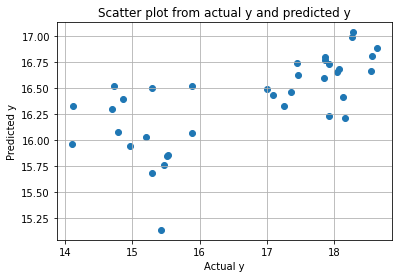

Mean Absolute percentage Error : 0.06842280435336198
r2 score is : 0.25758237623011837


In [569]:
#GBR model had best performance so Im using it to make the final prediction
reg = GradientBoostingRegressor(random_state=1)
reg.fit(X_train, Y_train)
y_pred_gbr = reg.predict(X_test)
plt.scatter(Y_test,y_pred_sksgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Absolute percentage Error :',mean_absolute_percentage_error(Y_test, y_pred_sksgd))
#print('Mean Absolute Error :',mean_absolute_error(Y_test, y_pred_sksgd))
print('r2 score is :', r2_score(Y_test, y_pred_sksgd))
#print('y is:', Y_test)
#print('predicted was:', y_pred_sksgd)

In [570]:
#creating final prediction column
fdf = pd.DataFrame()
fdf['prod'] = reg.predict(target[['ndvimean']])
fdf

,prod
0,17.435796
1,17.431796
2,17.534197
3,17.193038
4,18.217354
...,...
115,16.113409
116,15.880574
117,16.202674
118,15.204137


In [571]:
target

,prodmean,ndvimean,ndvistd,month,region_id,tempmean,tempstd,precipmean,precipstd,smosmean,smosstd,prodstd
0,17.710365,0.779871,0.030583,1,93,26.256897,2.018157,6.734694,18.279852,0.353934,0.087390,15.660437
1,17.682847,0.780302,0.017546,2,93,27.148711,2.148688,3.688939,8.912959,0.328579,0.075920,14.841879
2,17.833736,0.778867,0.023068,3,93,28.161942,2.585481,5.146203,8.226540,0.298108,0.067965,14.844737
3,17.903562,0.803795,0.015673,4,93,28.087259,1.991391,9.245788,8.468055,0.304315,0.069239,14.995630
4,17.918972,0.816674,0.014357,5,93,27.354363,2.143572,8.632011,7.248088,0.305914,0.077079,14.895839
...,...,...,...,...,...,...,...,...,...,...,...,...
115,15.637370,0.808546,0.011913,8,105,26.913939,2.190126,7.204407,6.407797,0.199416,0.088447,12.967090
116,15.683854,0.798222,0.031316,9,105,27.001864,2.307961,8.502863,7.538544,0.220041,0.101761,11.757168
117,15.759186,0.802803,0.019687,10,105,26.964059,2.274853,10.043377,10.087528,0.251855,0.133664,12.120552
118,15.564338,0.786172,0.040166,11,105,24.921609,2.546891,16.712988,20.664776,0.287078,0.138618,12.281647


In [577]:
#adding final predictions to final output
pp['prod'] = fdf['prod']
pp['prod'] = 2**fdf['prod']
pp


,start_date,end_date,prod,region_id
0,2021-01-01 00:00:00+00:00,2021-01-31 00:00:00+00:00,177295.436756,93
1,2021-02-01 00:00:00+00:00,2021-02-28 00:00:00+00:00,176804.513232,93
2,2021-03-01 00:00:00+00:00,2021-03-31 00:00:00+00:00,189810.013347,93
3,2021-04-01 00:00:00+00:00,2021-04-30 00:00:00+00:00,149837.383046,93
4,2021-05-01 00:00:00+00:00,2021-05-31 00:00:00+00:00,304768.533274,93
...,...,...,...,...
115,2021-08-01 00:00:00+00:00,2021-08-31 00:00:00+00:00,70895.624270,105
116,2021-09-01 00:00:00+00:00,2021-09-30 00:00:00+00:00,60329.422531,105
117,2021-10-01 00:00:00+00:00,2021-10-31 00:00:00+00:00,75420.770475,105
118,2021-11-01 00:00:00+00:00,2021-11-30 00:00:00+00:00,37748.651724,105
